## Classifying Newswires: Reuters dataset

- Classifying newswires into 46 mutually exclusive topics.
- Each data point should be classified into only one category, the problem is single label, multiclass classification.
- If each data point could belong to multiple categories, the problem would be Multi label, multiclass classification. 

### The Reuters Dataset

- There are 46 different topics. 
- Each topic has at least 10 examples.

In [1]:
# Loading the dataset

from keras.datasets import reuters

(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)
# num_words argument limits the data to top 10000 most frequently used words.

2024-05-21 20:09:35.301529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
# decoding back to newswire

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswires = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

# the indices are offset by 3 because 0,1,2 are reserved indices for "padding", "start of sequence" and "unknown".

In [5]:
decoded_newswires

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
# Preparing the data

import numpy as np

# Turning the list of integers into tensors by the method of onehot encoding to feed into NN.

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# one hot encoding the labels

def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#### Built in way to one hot encode labels

- from keras.utils.np_utils import to_categorical

- one_hot_train_labels = to_categorical(train_labels)
- one_hot_test_labels = to_categorical(test_labels)

In [8]:
# Building Network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
# Validating approach

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.6539 - accuracy: 0.4875 - val_loss: 1.8069 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5329 - accuracy: 0.6839 - val_loss: 1.3910 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1820 - accuracy: 0.7481 - val_loss: 1.2004 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9570 - accuracy: 0.7969 - val_loss: 1.0962 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.7945 - accuracy: 0.8271 - val_loss: 1.0094 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6581 - accuracy: 0.8564 - val_loss: 0.9713 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5520 - accuracy: 0.8824 - val_loss: 0.9324 - val_accuracy: 0.8060
Epoch 8/20
16

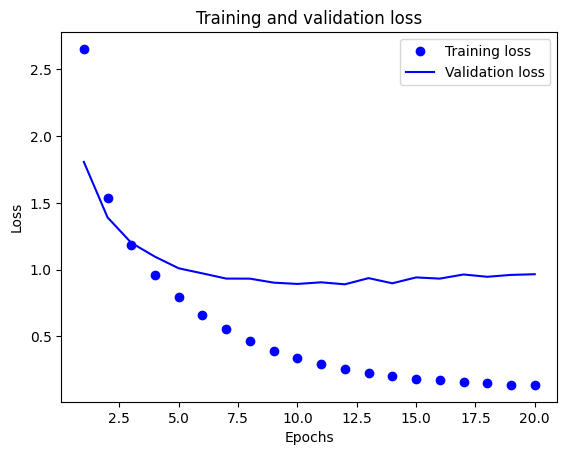

In [11]:
# Plotting the loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

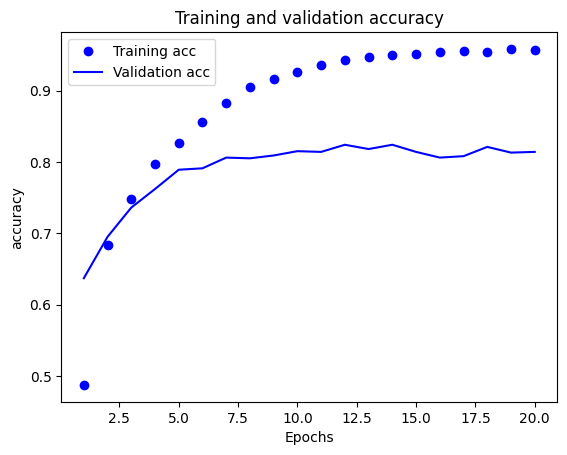

In [12]:
# plotting accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs=9, batch_size=512,validation_data=(x_val,y_val))

results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 37ms/step - loss: 2.7874 - accuracy: 0.4942 - val_loss: 1.8921 - val_accuracy: 0.6320
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.5662 - accuracy: 0.6802 - val_loss: 1.3896 - val_accuracy: 0.6940
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.1871 - accuracy: 0.7469 - val_loss: 1.2072 - val_accuracy: 0.7320
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.9622 - accuracy: 0.7980 - val_loss: 1.0954 - val_accuracy: 0.7680
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.7877 - accuracy: 0.8380 - val_loss: 1.0273 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 0s 21ms/step - loss: 0.6533 - accuracy: 0.8677 - val_loss: 0.9696 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.5411 - accuracy: 0.8908 - val_loss: 0.9621 - val_accuracy: 0.8000
Epoch 8/9
16/16 [===

In [14]:
results

[0.9857577681541443, 0.7791629433631897]

### Comparing with a random baseline:

Reasons:

1. Randomness Check: This code can be used to check how well the shuffling function randomizes the labels. In a well-shuffled list, very few labels should remain in their original positions.

2. Sanity Check: In training deep learning models, this kind of shuffling and checking can serve as a sanity check to ensure that there is no unintended order in the data that might bias the model training.

3. Data Augmentation and Validation:Sometimes, such tests are conducted to validate the robustness of a model or data pipeline. For example, if a model performs significantly well on a shuffled dataset, it might indicate that the model is not learning meaningful patterns but is instead exploiting some form of data leakage or noise.

4. Expectation Setting:The result, which is a float between 0 and 1, indicates the fraction of labels unchanged by shuffling. In a sufficiently large dataset, this value should be low (close to 1/N), indicating effective shuffling. A higher value might indicate inadequate shuffling or inherent ordering in the dataset.

- In summary, this code helps in verifying the randomness introduced by shuffling class labels in a multi-class classification setting, providing insights into the effectiveness of shuffling and ensuring that any model trained on this data is not unduly influenced by the original order of the labels.

In [15]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.19100623330365094

In [16]:
# Predicting on new data

predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [17]:
predictions[0].shape

(46,)

In [18]:
np.sum(predictions[0])

0.9999998

In [19]:
np.argmax(predictions[0])

4

In [21]:
# building model

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train, epochs=20,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.9095 - accuracy: 0.3420 - val_loss: 2.2658 - val_accuracy: 0.3550
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 2.0141 - accuracy: 0.4643 - val_loss: 1.8003 - val_accuracy: 0.5440
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.6626 - accuracy: 0.5748 - val_loss: 1.6235 - val_accuracy: 0.5900
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.4812 - accuracy: 0.6041 - val_loss: 1.5421 - val_accuracy: 0.5950
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3571 - accuracy: 0.6292 - val_loss: 1.5004 - val_accuracy: 0.6040
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2596 - accuracy: 0.6671 - val_loss: 1.4582 - val_accuracy: 0.6620
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1708 - accuracy: 0.7070 - val_loss: 1.4267 - val_accuracy: 0.6710
Epoch 8/20
63

- The 8% drop can be justified as the compression of a lot of information into an intermediate low dimensional space from seperation hyperplanes of 46 dimensions.

#### Take aways
- For classification of n classes, the network should end with Dense layer of size n.
- The network should end with softmax activation, so that the output will be a probability distribution over n classes.
- Loss function used is categorical crossentropy as it minimises the distance between output probability distribution and true distribution of targets.
- Two ways to handle categorical encoding in multiclass classification:
    - Categorical encoding (one hot encoding) and loss function is categorical_crossentropy.
    - Encoding the labels as integers and using sparse_categorical_crossentropy as loss function.
- information bottleneck should be avoided in the network caused by too small intermediate layers. 